# Random Forest Classifier

So far [LogisticRegression Classifier](project_lr.ipynb) and [SGD Classifier](project_sgd.ipynb) have been used. Both of them have not performed that well. Also, imbalanced classifier have not fared at all. Random Forest seems to be the best bet. Instead of trying different samples, only 50-50 balanced sample will be used for this thread. 

In [2]:
# First thing first - bring necessary modules in
%matplotlib inline
# a utility project level module for
# loading samples and plotting data
import project_utils as pu
# a utility project level module
# for classification
import model_utils as mu
# numpy and pandas
import numpy as np
import pandas as pd
# plots
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
# Load sample with 50-50 (pos-neg) balance
df_50 = pu.sample_data(num_samples_per_bin=100, frac_pos=0.5)
# Load sample with 33-66 (pos-neg) balance
df_33 = pu.sample_data(num_samples_per_bin=100, frac_pos=0.33)
# Load sample with 20-80 (pos-neg) balance
df_20 = pu.sample_data(num_samples_per_bin=100, frac_pos=0.2)

In [10]:
# Workout X and y for different samples
X50 = df_50[pu.x_columns].values
y50 = (df_50.click > 0).values
X33 = df_33[pu.x_columns].values
y33 = (df_33.click > 0).values
X20 = df_20[pu.x_columns].values
y20 = (df_20.click > 0).values

In [5]:
# Split the data into a training and test set.
X, Xtest, y, ytest = train_test_split(df_50[pu.x_columns].values, 
                                              (df_50.click > 0).values, random_state=5)

## RFC with do_classify

In [8]:
clf_rfc_50, Xtrain_rfc_50, ytrain_rfc_50, Xtest_rfc_50, ytest_rfc_50  = mu.do_classify(
                                                           RandomForestClassifier(oob_score=True), 
                                                           {"n_estimators": [80, 100, 120, 150],
                                                            "min_samples_leaf": [20, 50, 80]}, 
                                                           df_50, pu.x_columns, 'click', 0)

BEST PARAMS {'min_samples_leaf': 20, 'n_estimators': 100}
Accuracy on training data: 0.70
Accuracy on test data:     0.67


## RFC Accuracy Score:

In [11]:
print("Accuracy Score ytest: %f" % accuracy_score(clf_rfc_50.predict(Xtest), ytest))
print("Accuracy Score ytest: %f" % accuracy_score(clf_rfc_50.predict(X33), y33))
print("Accuracy Score ytest: %f" % accuracy_score(clf_rfc_50.predict(X20), y20))

Accuracy Score ytest: 0.697304
Accuracy Score ytest: 0.645692
Accuracy Score ytest: 0.631791


The accuracy scores seem to be consistent across different data-set.

## RFC Confusion Matrix:

In [13]:
print(confusion_matrix(ytest_rfc_50, clf_rfc_50.predict(Xtest_rfc_50)))

[[4961 3052]
 [2304 5855]]


In [14]:
print(confusion_matrix(y33, clf_rfc_50.predict(X33)))

[[33225 20950]
 [ 7699 18985]]


In [15]:
print(confusion_matrix(y20, clf_rfc_50.predict(X20)))

[[39546 25141]
 [ 4632 11540]]


The confusion matrix results suggest that this classifier has higher True Positive and True Negative cells.

## RFC Data Projection:

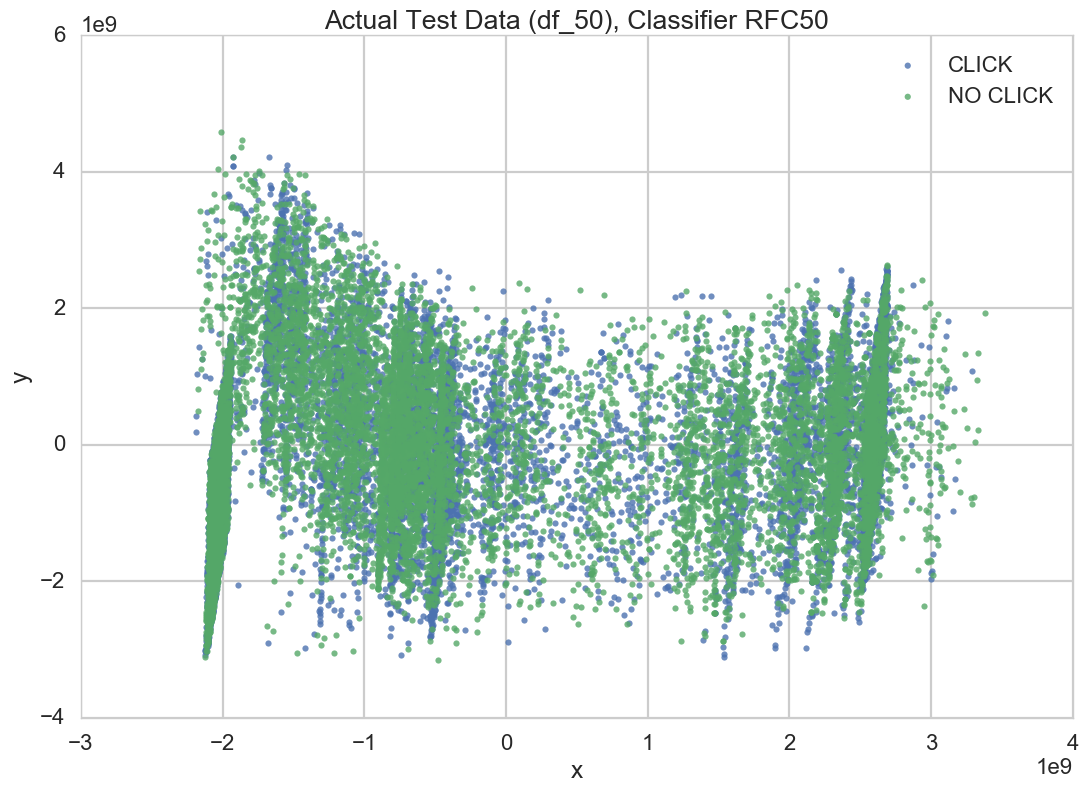

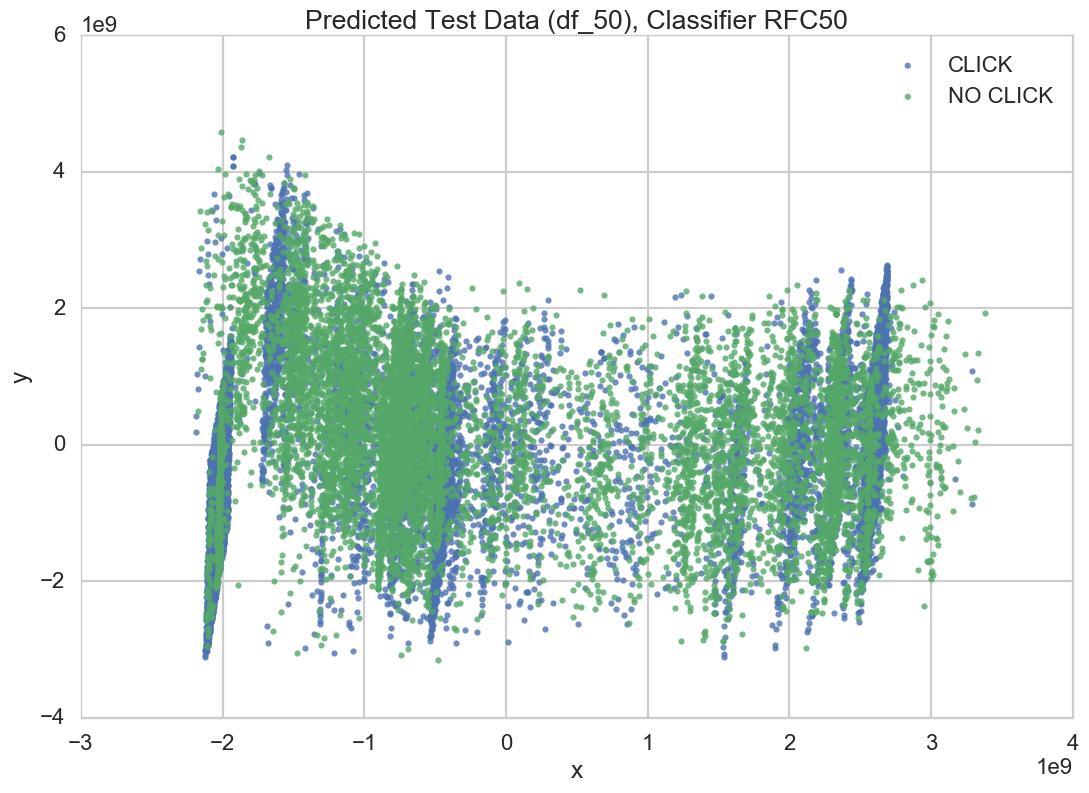

In [16]:
pu.plot_distribution(Xtest, ytest, clf_rfc_50, predicted=False, title="Actual Test Data (df_50), Classifier RFC50")
pu.plot_distribution(Xtest, ytest, clf_rfc_50, predicted=True, title="Predicted Test Data (df_50), Classifier RFC50")

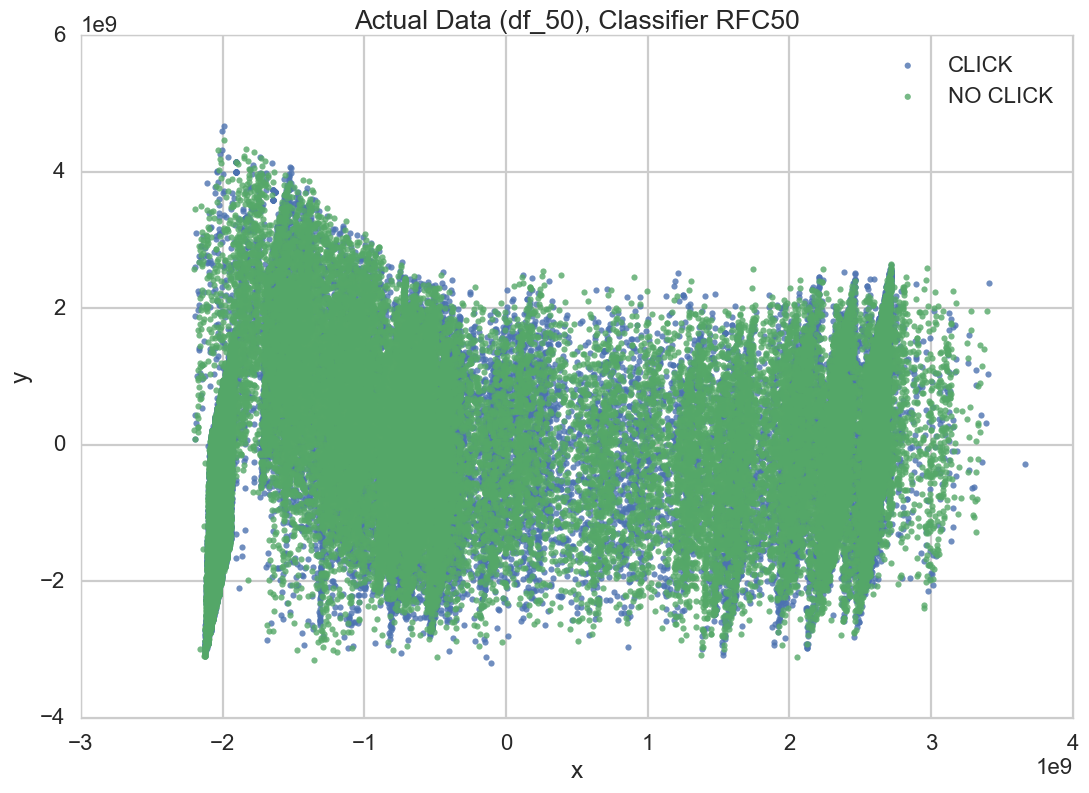

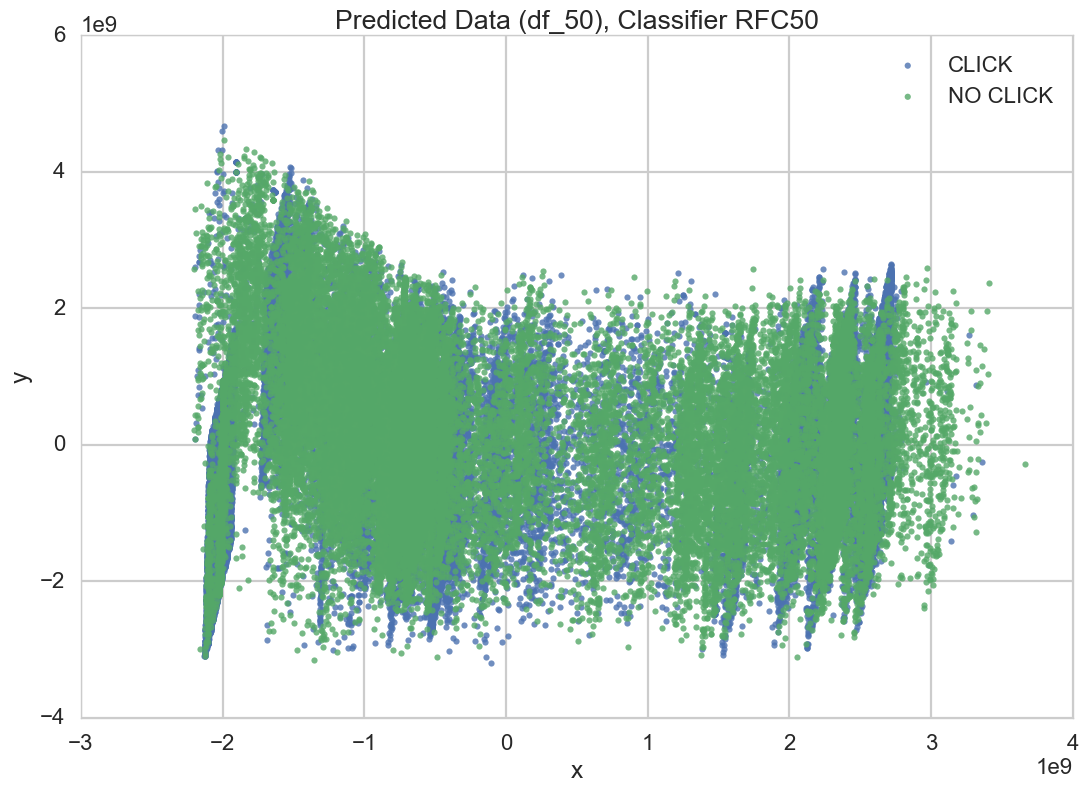

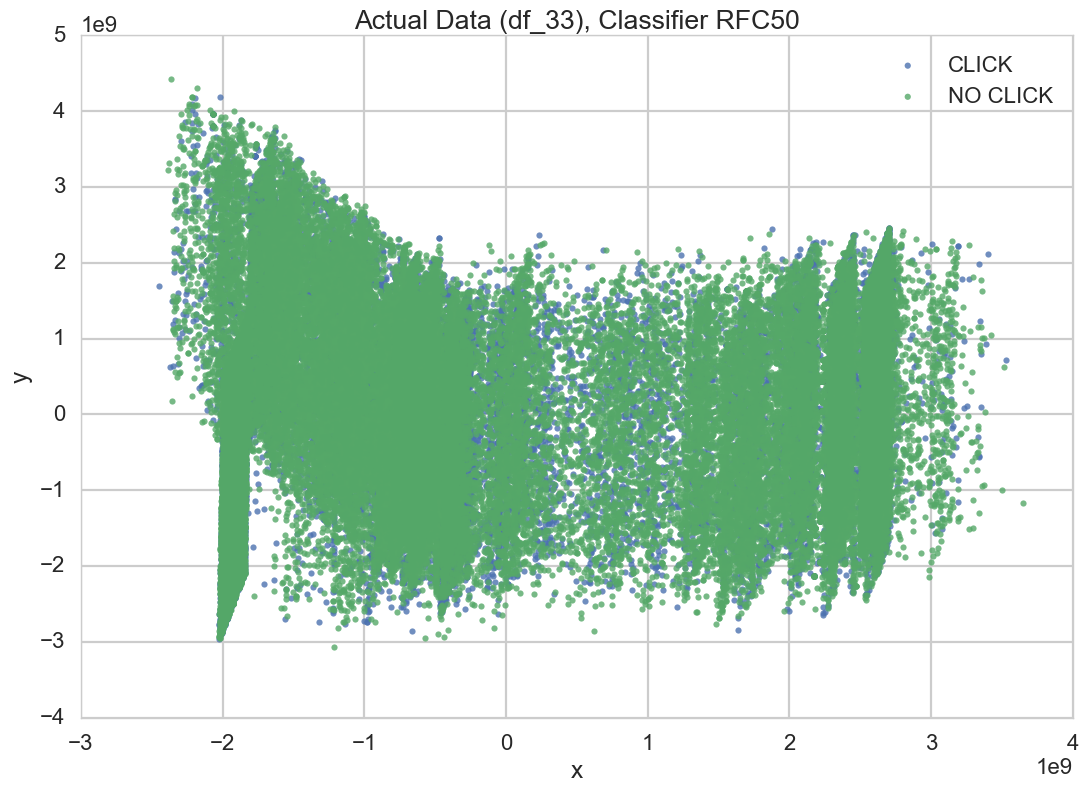

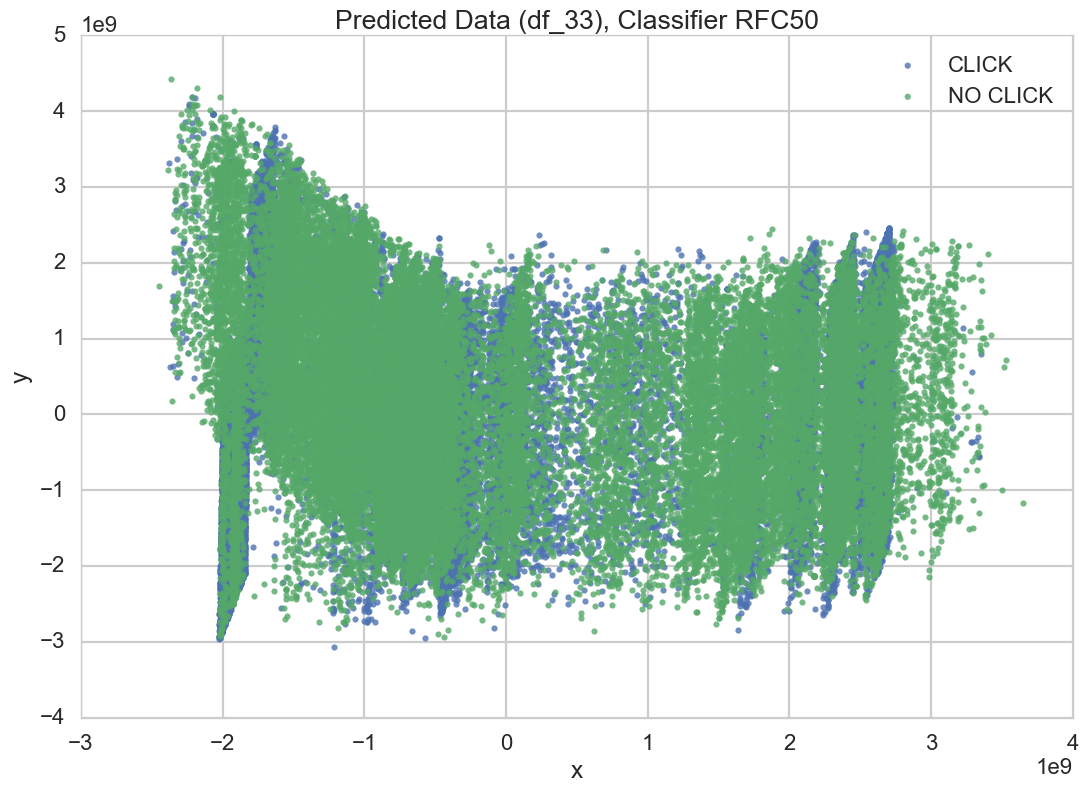

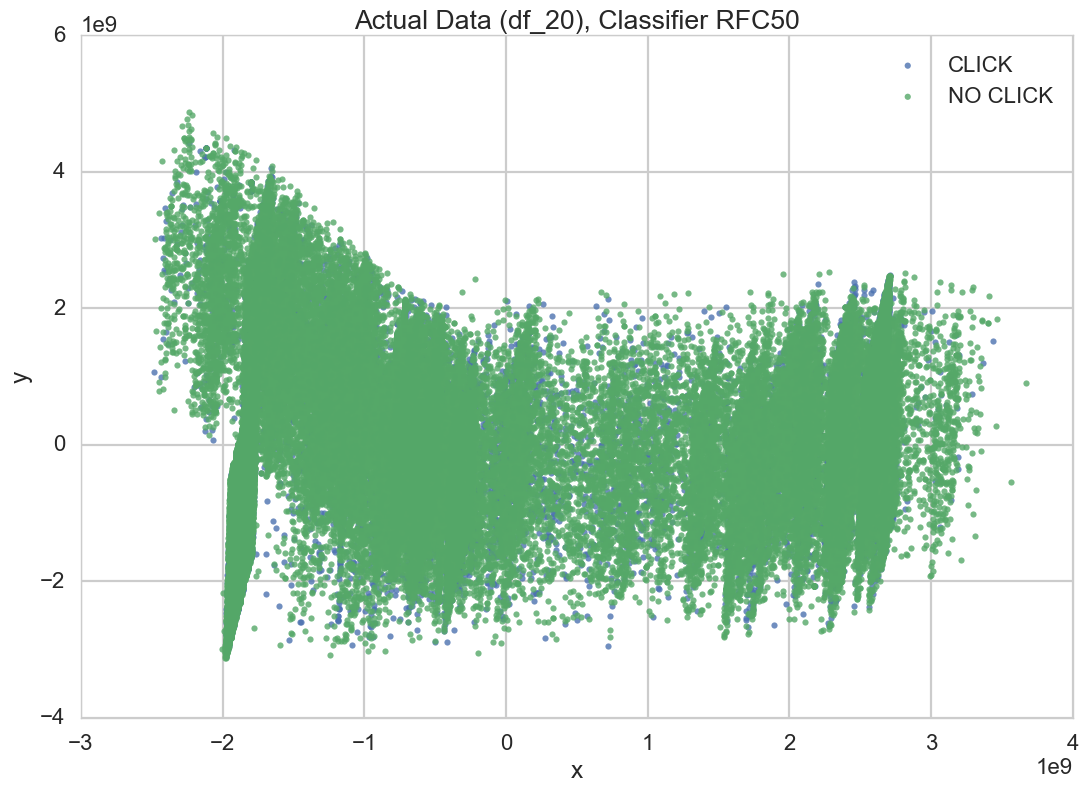

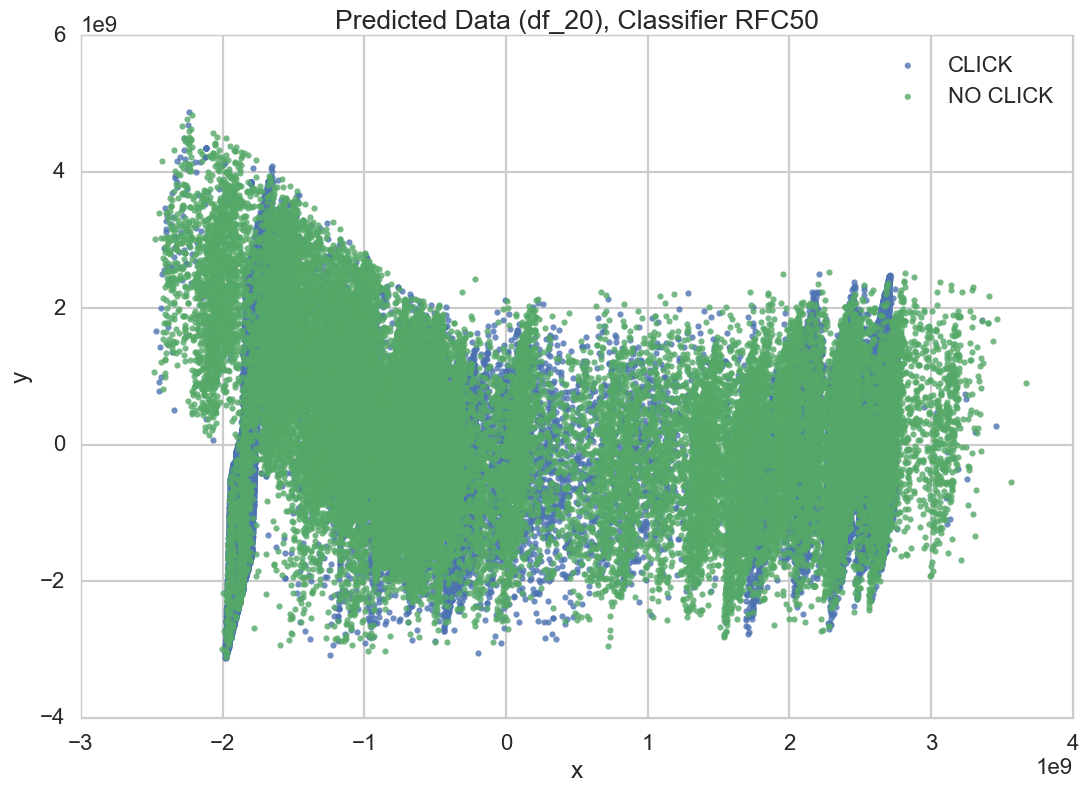

In [17]:
pu.plot_distribution(X50, y50, clf_rfc_50, predicted=False, title="Actual Data (df_50), Classifier RFC50")
pu.plot_distribution(X50, y50, clf_rfc_50, predicted=True, title="Predicted Data (df_50), Classifier RFC50")
pu.plot_distribution(X33, y33, clf_rfc_50, predicted=False, title="Actual Data (df_33), Classifier RFC50")
pu.plot_distribution(X33, y33, clf_rfc_50, predicted=True, title="Predicted Data (df_33), Classifier RFC50")
pu.plot_distribution(X20, y20, clf_rfc_50, predicted=False, title="Actual Data (df_20), Classifier RFC50")
pu.plot_distribution(X20, y20, clf_rfc_50, predicted=True, title="Predicted Data (df_20), Classifier RFC50")

### Plot Observations:

By and large RFC50 classifier seems to be doing good job. However, with 20-80 imbalanced data, it has higher False Positives.

## Calibration Curve:

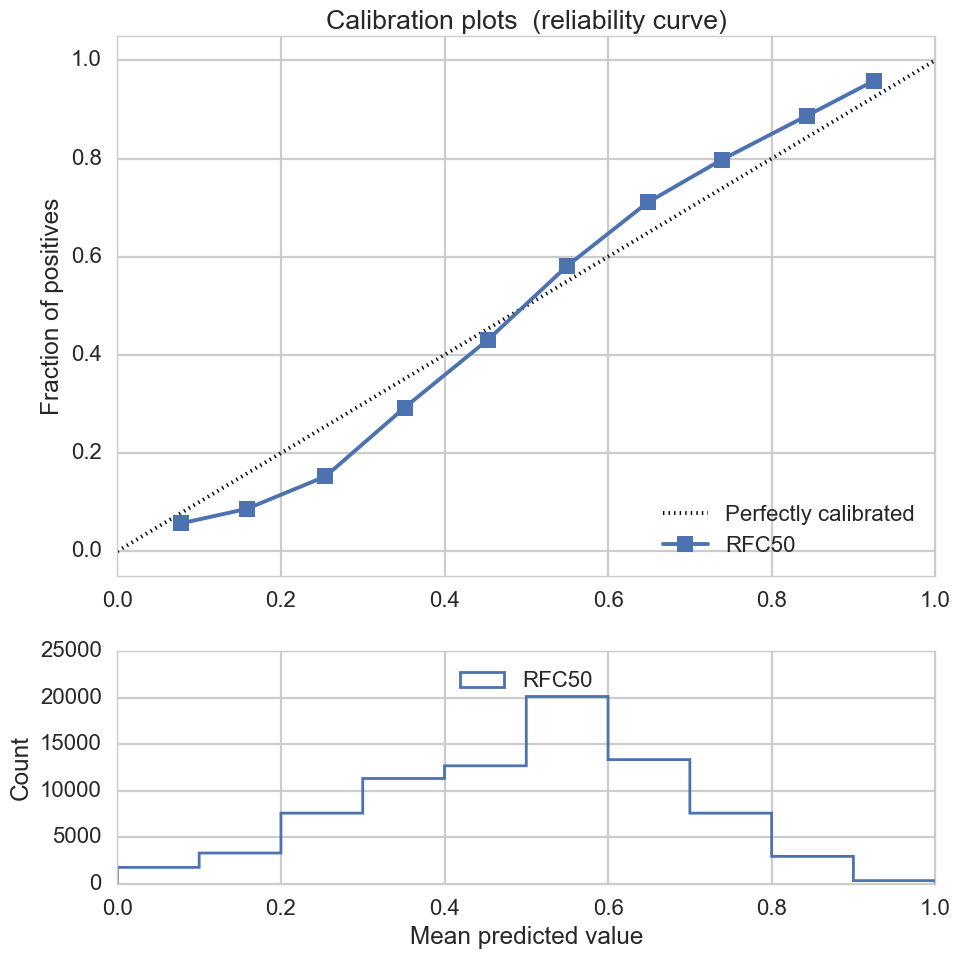

In [18]:
pu.calibration_plot([(clf_rfc_50, 'RFC50')], X50, y50)

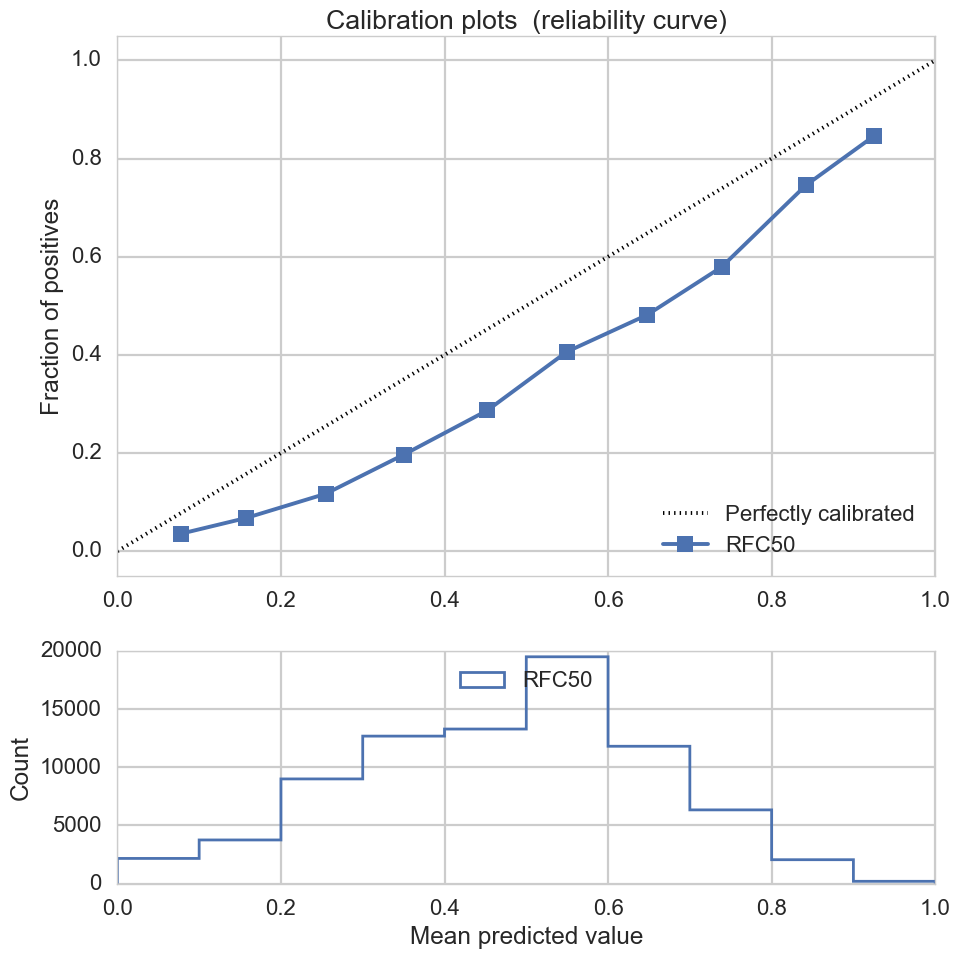

In [19]:
pu.calibration_plot([(clf_rfc_50, 'RFC50')], X33, y33)

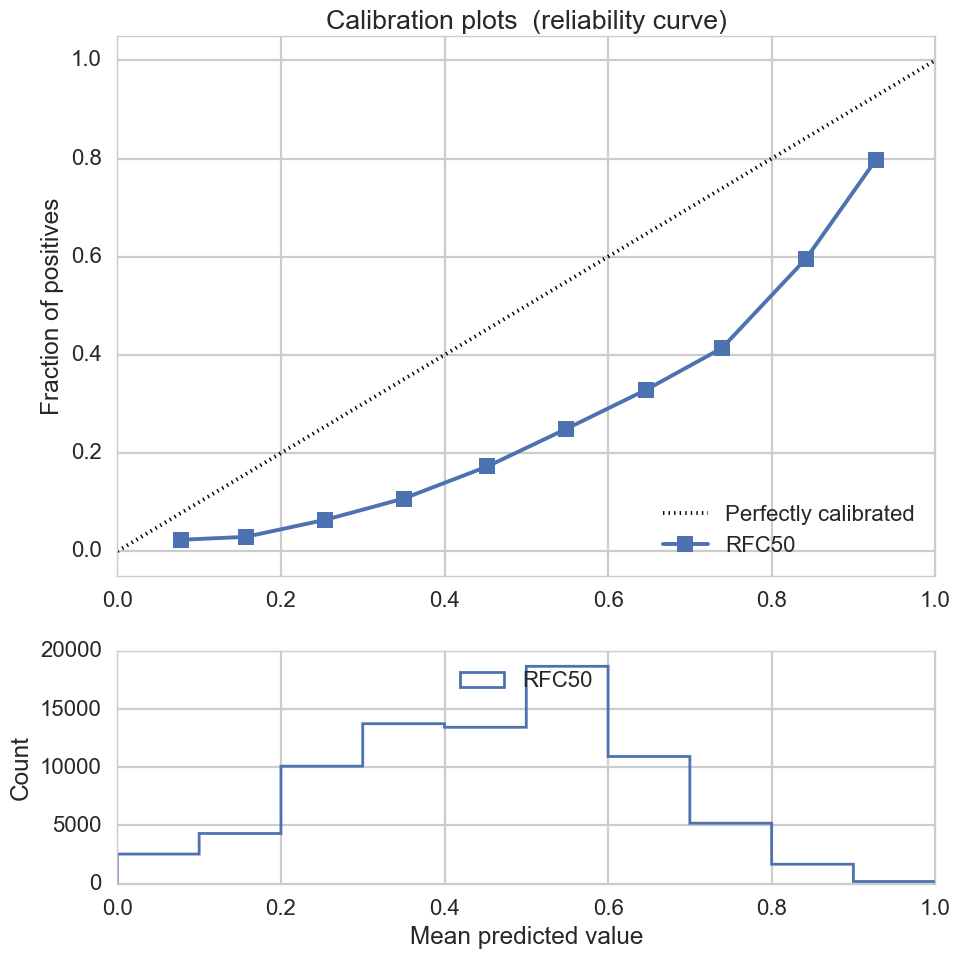

In [20]:
pu.calibration_plot([(clf_rfc_50, 'RFC50')], X20, y20)

### Calibrtion Curve Observations:

The probability distribution of 50-50 balanced sample seems to be sticking to perfectly calibrated line. It deeps a little bit with other data set but the performace of this classifier seems to be far better than other classifiers.

## Test Data With RFC50 Classifier:

In [25]:
import importlib
importlib.reload(pu)

<module 'project_utils' from 'c:\\Users\\amees\\Documents\\my_work\\data_science_workshop\\capstone_project\\project\\project_utils.py'>

In [22]:
df_test = pu.sample_test_data()

In [23]:
XTEST = df_test[pu.x_columns].values
yTEST = clf_rfc_50.predict(XTEST)

### Calculate CTR for the Test Data:

In [30]:
print("TEST CTR: {:.2f}%".format(pu.calculate_test_ctr(df_test, yTEST)))

TEST CTR: 36.78%


### TEST Data Projection:

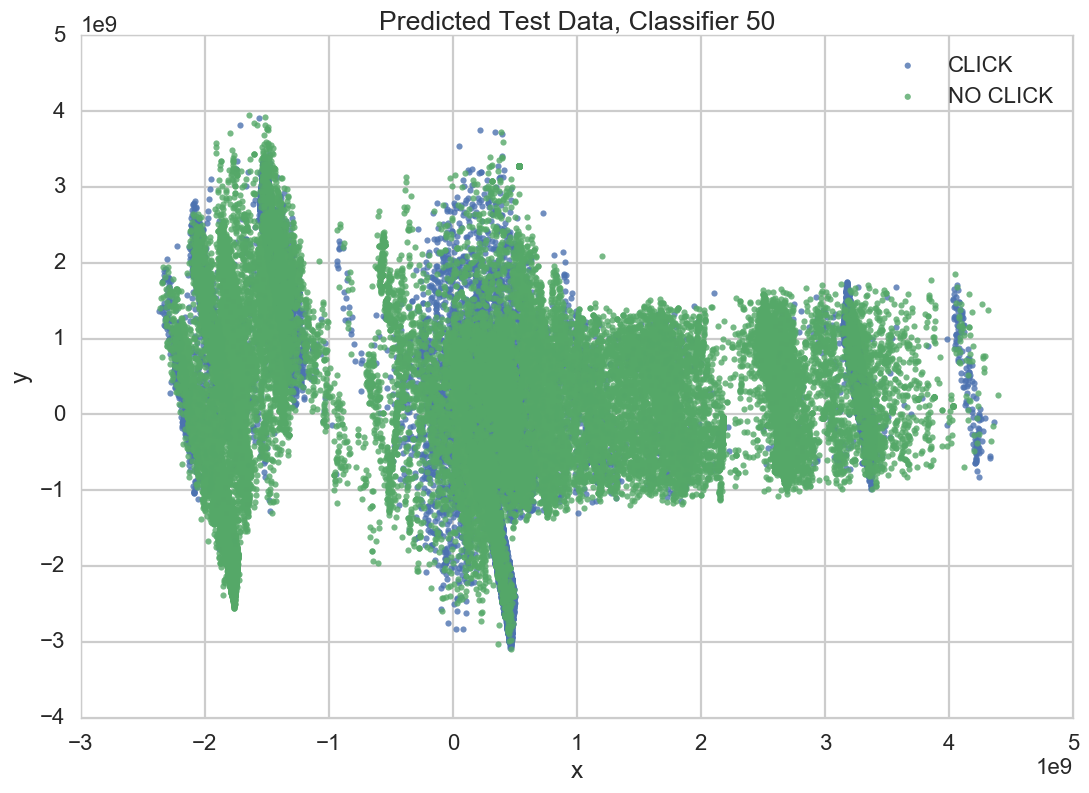

In [28]:
pu.plot_distribution(XTEST, None, clf_rfc_50, predicted=True, title="Predicted Test Data, Classifier 50")

### Next Step:
The sample is only **0.2%** of the whole data-set. Next step is to take bigger sample on server and see how this classifier holds against the classifier with larger sample.